In [5]:
from common_models_storage import load, load_dataframe, save_dataframe
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [65]:
Auto = pd.read_csv("Auto.csv", na_values=['?'])

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
Auto.tail()

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [54]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [50]:
for column in Auto.columns:
    print(f"\ncolumn = {column}")
    print(f"min = {Auto[column].min()}")
    print(f"max = {Auto[column].max()}")


column = mpg
min = 9.0
max = 46.6

column = cylinders
min = 3
max = 8

column = displacement
min = 68.0
max = 455.0

column = horsepower
min = 46.0
max = 230.0

column = weight
min = 1613
max = 5140

column = acceleration
min = 8.0
max = 24.8

column = year
min = 70
max = 82

column = origin
min = 1
max = 3

column = name
min = amc ambassador brougham
max = vw rabbit custom


In [55]:
for column in Auto.columns:
    print(f"\ncolumn = {column}")
    print(f"mean = {Auto[column].mean()}")
    print(f"std = {Auto[column].std()}")

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



column = mpg
mean = 23.445918367346938
std = 7.8050074865717995

column = cylinders
mean = 5.471938775510204
std = 1.7057832474527845

column = displacement
mean = 194.41198979591837
std = 104.64400390890466

column = horsepower
mean = 104.46938775510205
std = 38.49115993282849

column = weight
mean = 2977.5841836734694
std = 849.4025600429492

column = acceleration
mean = 15.541326530612244
std = 2.758864119188082

column = year
mean = 75.9795918367347
std = 3.6837365435778295

column = origin
mean = 1.5765306122448979
std = 0.8055181834183056

column = name


TypeError: Could not convert string 'chevrolet chevelle malibubuick skylark 320plymouth satelliteamc rebel sstford torinoford galaxie 500chevrolet impalaplymouth fury iiipontiac catalinaamc ambassador dpldodge challenger seplymouth 'cuda 340chevrolet monte carlobuick estate wagon (sw)toyota corona mark iiplymouth dusteramc hornetford maverickdatsun pl510volkswagen 1131 deluxe sedanpeugeot 504audi 100 lssaab 99ebmw 2002amc gremlinford f250chevy c20dodge d200hi 1200ddatsun pl510chevrolet vega 2300toyota coronaamc gremlinplymouth satellite customchevrolet chevelle malibuford torino 500amc matadorchevrolet impalapontiac catalina broughamford galaxie 500plymouth fury iiidodge monaco (sw)ford country squire (sw)pontiac safari (sw)amc hornet sportabout (sw)chevrolet vega (sw)pontiac firebirdford mustangmercury capri 2000opel 1900peugeot 304fiat 124btoyota corolla 1200datsun 1200volkswagen model 111plymouth crickettoyota corona hardtopdodge colt hardtopvolkswagen type 3chevrolet vegaford pinto runaboutchevrolet impalapontiac catalinaplymouth fury iiiford galaxie 500amc ambassador sstmercury marquisbuick lesabre customoldsmobile delta 88 royalechrysler newport royalmazda rx2 coupeamc matador (sw)chevrolet chevelle concours (sw)ford gran torino (sw)plymouth satellite custom (sw)volvo 145e (sw)volkswagen 411 (sw)peugeot 504 (sw)renault 12 (sw)ford pinto (sw)datsun 510 (sw)toyouta corona mark ii (sw)dodge colt (sw)toyota corolla 1600 (sw)buick century 350amc matadorchevrolet malibuford gran torinododge coronet custommercury marquis broughamchevrolet caprice classicford ltdplymouth fury gran sedanchrysler new yorker broughambuick electra 225 customamc ambassador broughamplymouth valiantchevrolet nova customamc hornetford maverickplymouth dustervolkswagen super beetlechevrolet impalaford countryplymouth custom suburboldsmobile vista cruiseramc gremlintoyota carinachevrolet vegadatsun 610maxda rx3ford pintomercury capri v6fiat 124 sport coupechevrolet monte carlo spontiac grand prixfiat 128opel mantaaudi 100lsvolvo 144eadodge dart customsaab 99letoyota mark iioldsmobile omegaplymouth dusteramc hornetchevrolet novadatsun b210ford pintotoyota corolla 1200chevrolet vegachevrolet chevelle malibu classicamc matadorplymouth satellite sebringford gran torinobuick century luxus (sw)dodge coronet custom (sw)ford gran torino (sw)amc matador (sw)audi foxvolkswagen dasheropel mantatoyota coronadatsun 710dodge coltfiat 128fiat 124 tchonda civicsubarufiat x1.9plymouth valiant customchevrolet novamercury monarchford maverickpontiac catalinachevrolet bel airplymouth grand furyford ltdbuick centurychevroelt chevelle malibuamc matadorplymouth furybuick skyhawkchevrolet monza 2+2ford mustang iitoyota corollaford pintoamc gremlinpontiac astrotoyota coronavolkswagen dasherdatsun 710ford pintovolkswagen rabbitamc paceraudi 100lspeugeot 504volvo 244dlsaab 99lehonda civic cvccfiat 131opel 1900capri iidodge coltrenault 12tlchevrolet chevelle malibu classicdodge coronet broughamamc matadorford gran torinoplymouth valiantchevrolet novaford maverickamc hornetchevrolet chevettechevrolet woodyvw rabbithonda civicdodge aspen seford granada ghiapontiac ventura sjamc pacer d/lvolkswagen rabbitdatsun b-210toyota corollaford pintovolvo 245plymouth volare premier v8peugeot 504toyota mark iimercedes-benz 280scadillac sevillechevy c10ford f108dodge d100honda accord cvccbuick opel isuzu deluxerenault 5 gtlplymouth arrow gsdatsun f-10 hatchbackchevrolet caprice classicoldsmobile cutlass supremedodge monaco broughammercury cougar broughamchevrolet concoursbuick skylarkplymouth volare customford granadapontiac grand prix ljchevrolet monte carlo landauchrysler cordobaford thunderbirdvolkswagen rabbit custompontiac sunbird coupetoyota corolla liftbackford mustang ii 2+2chevrolet chevettedodge colt m/msubaru dlvolkswagen dasherdatsun 810bmw 320imazda rx-4volkswagen rabbit custom dieselford fiestamazda glc deluxedatsun b210 gxhonda civic cvccoldsmobile cutlass salon broughamdodge diplomatmercury monarch ghiapontiac phoenix ljchevrolet malibuford fairmont (auto)ford fairmont (man)plymouth volareamc concordbuick century specialmercury zephyrdodge aspenamc concord d/lchevrolet monte carlo landaubuick regal sport coupe (turbo)ford futuradodge magnum xechevrolet chevettetoyota coronadatsun 510dodge omnitoyota celica gt liftbackplymouth sapporooldsmobile starfire sxdatsun 200-sxaudi 5000volvo 264glsaab 99glepeugeot 604slvolkswagen sciroccohonda accord lxpontiac lemans v6mercury zephyr 6ford fairmont 4amc concord dl 6dodge aspen 6chevrolet caprice classicford ltd landaumercury grand marquisdodge st. regisbuick estate wagon (sw)ford country squire (sw)chevrolet malibu classic (sw)chrysler lebaron town @ country (sw)vw rabbit custommaxda glc deluxedodge colt hatchback customamc spirit dlmercedes benz 300dcadillac eldoradopeugeot 504oldsmobile cutlass salon broughamplymouth horizonplymouth horizon tc3datsun 210fiat strada custombuick skylark limitedchevrolet citationoldsmobile omega broughampontiac phoenixvw rabbittoyota corolla tercelchevrolet chevettedatsun 310chevrolet citationford fairmontamc concorddodge aspenaudi 4000toyota corona liftbackmazda 626datsun 510 hatchbacktoyota corollamazda glcdodge coltdatsun 210vw rabbit c (diesel)vw dasher (diesel)audi 5000s (diesel)mercedes-benz 240dhonda civic 1500 glsubaru dlvokswagen rabbitdatsun 280-zxmazda rx-7 gstriumph tr7 coupehonda accordplymouth reliantbuick skylarkdodge aries wagon (sw)chevrolet citationplymouth relianttoyota starletplymouth champhonda civic 1300subarudatsun 210 mpgtoyota tercelmazda glc 4plymouth horizon 4ford escort 4wford escort 2hvolkswagen jettahonda preludetoyota corolladatsun 200sxmazda 626peugeot 505s turbo dieselvolvo dieseltoyota cressidadatsun 810 maximabuick centuryoldsmobile cutlass lsford granada glchrysler lebaron salonchevrolet cavalierchevrolet cavalier wagonchevrolet cavalier 2-doorpontiac j2000 se hatchbackdodge aries sepontiac phoenixford fairmont futuravolkswagen rabbit lmazda glc custom lmazda glc customplymouth horizon misermercury lynx lnissan stanza xehonda accordtoyota corollahonda civichonda civic (auto)datsun 310 gxbuick century limitedoldsmobile cutlass ciera (diesel)chrysler lebaron medallionford granada ltoyota celica gtdodge charger 2.2chevrolet camaroford mustang glvw pickupdodge rampageford rangerchevy s-10' to numeric

In [72]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [66]:
Auto2 = Auto.drop(Auto.index[9:85])

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
Auto2.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
85,13.0,8,350.0,175.0,4100,13.0,73,1,buick century 350


In [93]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from itertools import product

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


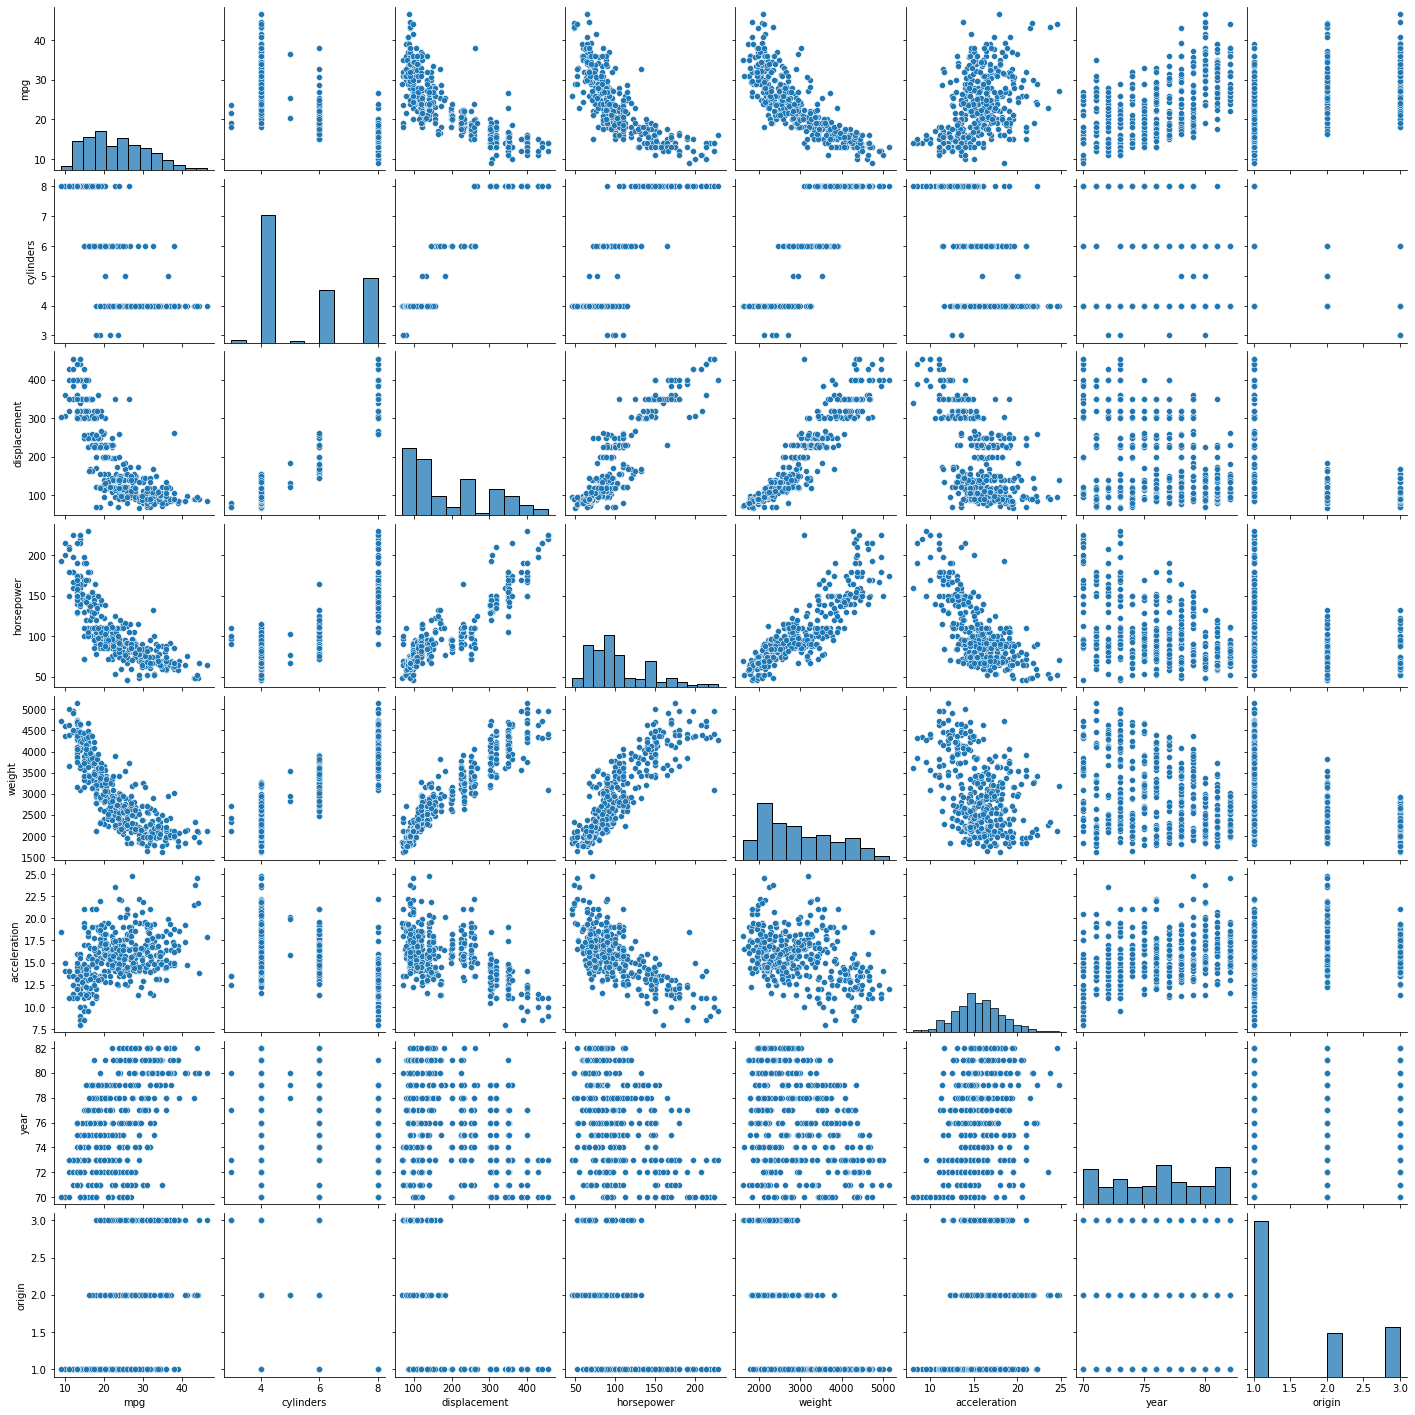

In [94]:
sns.pairplot(Auto3)

In [89]:
Auto3 = Auto.drop(columns=["name"])

In [91]:
combos = product(Auto3.columns, Auto3.columns)

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


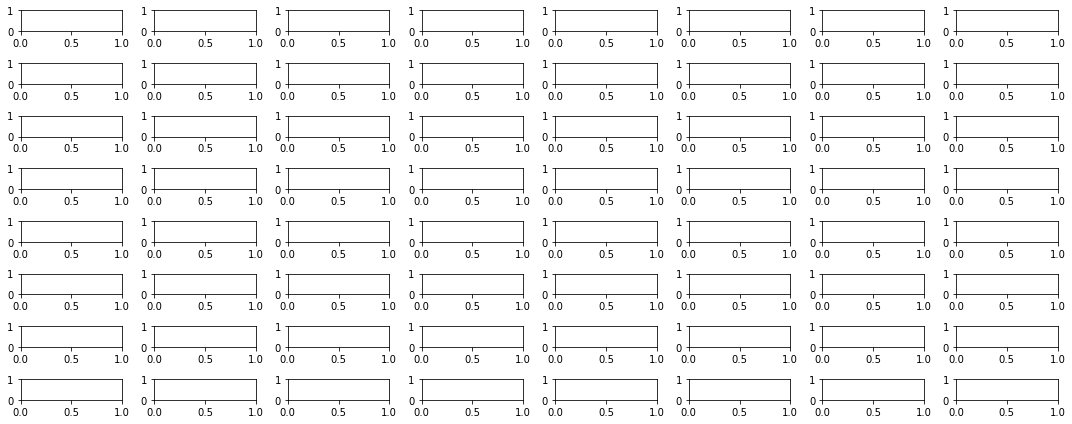

In [101]:
fig, axes = plt.subplots(nrows=len(Auto3.columns), ncols=len(Auto3.columns), figsize=(15, 6))
axes = axes.flat

for (x, y), ax in zip(combos, axes):
    ax.scatter(Auto3[x], Auto3[y])
    ax.set(title=f'{x} vs. {y}', xlabel=x, ylabel=y)
plt.tight_layout()
plt.show()

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'x' is not defined

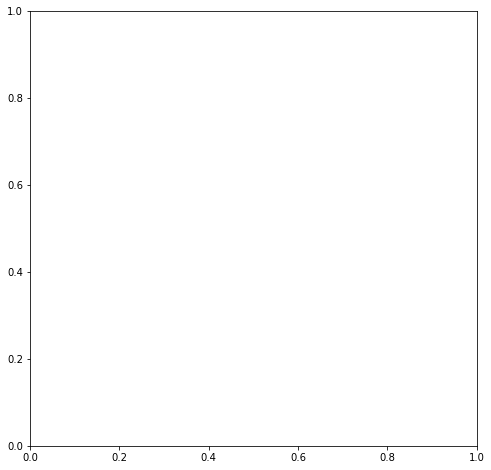

In [70]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

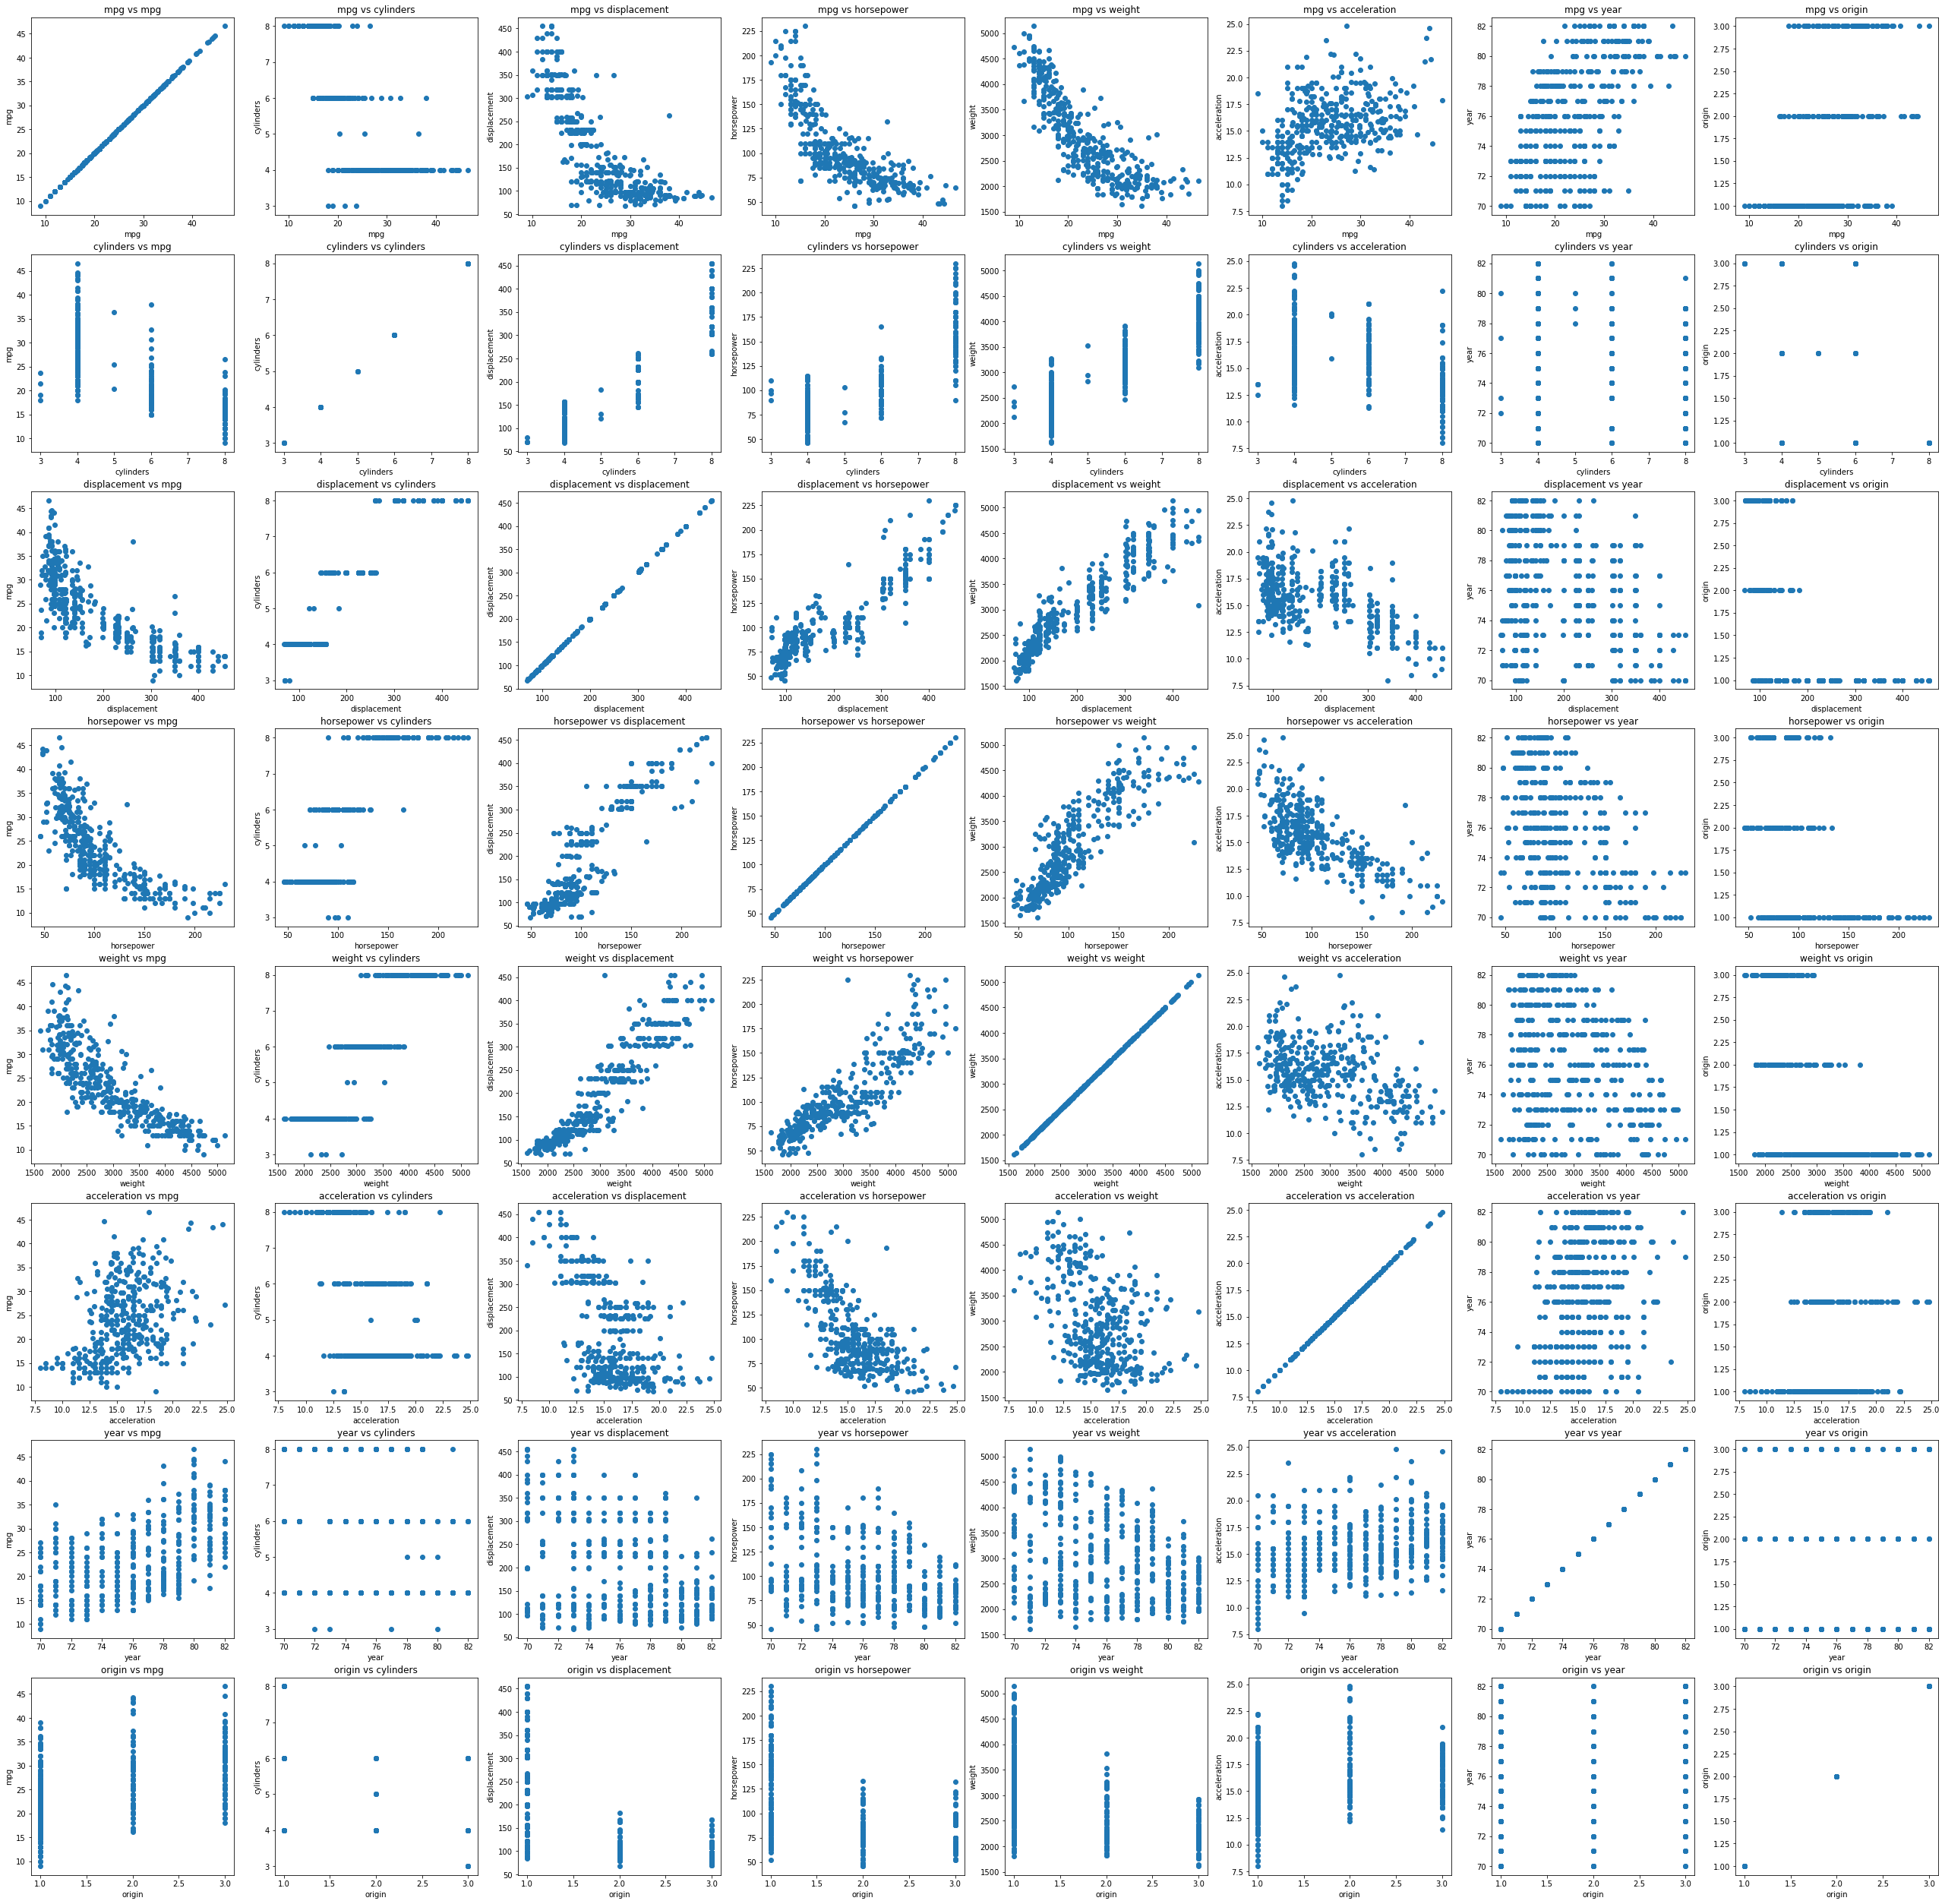

In [115]:
fig, axes = subplots(nrows=8, ncols=8, figsize=(45, 45))

for i in range(len(Auto3.columns)):
    column_1 = Auto3.columns[i]
    for j in range(len(Auto3.columns)):
        column_1 = Auto3.columns[i]
        column_2 = Auto3.columns[j]
        x = Auto3[column_1]
        y = Auto3[column_2]
        
        axes[i,j].scatter(x, y, marker='o')
        axes[i,j].set_xlabel(column_1)
        axes[i,j].set_ylabel(column_2)
        axes[i,j].set_title(f"{column_1} vs {column_2}");

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


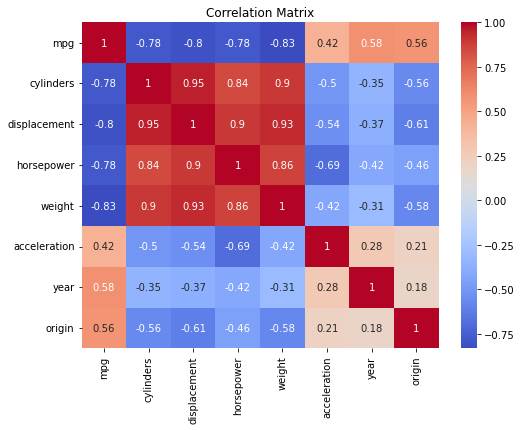

In [125]:
plt.figure(figsize=(8, 6))
corr_matrix = Auto3.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [68]:
for column in Auto2.columns:
    print(f"\ncolumn = {column}")
    print(f"min = {Auto2[column].min()}")
    print(f"max = {Auto2[column].max()}")
    print(f"mean = {Auto2[column].mean()}")
    print(f"std = {Auto2[column].std()}")


column = mpg
min = 11.0
max = 46.6
mean = 24.438629283489096
std = 7.90818424894519

column = cylinders
min = 3
max = 8
mean = 5.370716510903427
std = 1.6534856508321407

column = displacement
min = 68.0
max = 455.0
mean = 187.04984423676012
std = 99.63538531961505

column = horsepower
min = 46.0
max = 230.0
mean = 100.95583596214512
std = 35.89556677713123

column = weight
min = 1649
max = 4997
mean = 2933.96261682243
std = 810.6429384125485

column = acceleration
min = 8.5
max = 24.8
mean = 15.723052959501558
std = 2.6805138313971684

column = year
min = 70
max = 82
mean = 77.15264797507788
std = 3.1112297856018607

column = origin
min = 1
max = 3
mean = 1.5981308411214954
std = 0.8161626647471095

column = name
min = amc ambassador brougham
max = vw rabbit custom


/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: Could not convert string 'chevrolet chevelle malibubuick skylark 320plymouth satelliteamc rebel sstford torinoford galaxie 500chevrolet impalaplymouth fury iiipontiac catalinabuick century 350amc matadorchevrolet malibuford gran torinododge coronet custommercury marquis broughamchevrolet caprice classicford ltdplymouth fury gran sedanchrysler new yorker broughambuick electra 225 customamc ambassador broughamplymouth valiantchevrolet nova customamc hornetford maverickplymouth dustervolkswagen super beetlechevrolet impalaford countryplymouth custom suburboldsmobile vista cruiseramc gremlintoyota carinachevrolet vegadatsun 610maxda rx3ford pintomercury capri v6fiat 124 sport coupechevrolet monte carlo spontiac grand prixfiat 128opel mantaaudi 100lsvolvo 144eadodge dart customsaab 99letoyota mark iioldsmobile omegaplymouth dusterford maverickamc hornetchevrolet novadatsun b210ford pintotoyota corolla 1200chevrolet vegachevrolet chevelle malibu classicamc matadorplymouth satellite sebringford gran torinobuick century luxus (sw)dodge coronet custom (sw)ford gran torino (sw)amc matador (sw)audi foxvolkswagen dasheropel mantatoyota coronadatsun 710dodge coltfiat 128fiat 124 tchonda civicsubarufiat x1.9plymouth valiant customchevrolet novamercury monarchford maverickpontiac catalinachevrolet bel airplymouth grand furyford ltdbuick centurychevroelt chevelle malibuamc matadorplymouth furybuick skyhawkchevrolet monza 2+2ford mustang iitoyota corollaford pintoamc gremlinpontiac astrotoyota coronavolkswagen dasherdatsun 710ford pintovolkswagen rabbitamc paceraudi 100lspeugeot 504volvo 244dlsaab 99lehonda civic cvccfiat 131opel 1900capri iidodge coltrenault 12tlchevrolet chevelle malibu classicdodge coronet broughamamc matadorford gran torinoplymouth valiantchevrolet novaford maverickamc hornetchevrolet chevettechevrolet woodyvw rabbithonda civicdodge aspen seford granada ghiapontiac ventura sjamc pacer d/lvolkswagen rabbitdatsun b-210toyota corollaford pintovolvo 245plymouth volare premier v8peugeot 504toyota mark iimercedes-benz 280scadillac sevillechevy c10ford f108dodge d100honda accord cvccbuick opel isuzu deluxerenault 5 gtlplymouth arrow gsdatsun f-10 hatchbackchevrolet caprice classicoldsmobile cutlass supremedodge monaco broughammercury cougar broughamchevrolet concoursbuick skylarkplymouth volare customford granadapontiac grand prix ljchevrolet monte carlo landauchrysler cordobaford thunderbirdvolkswagen rabbit custompontiac sunbird coupetoyota corolla liftbackford mustang ii 2+2chevrolet chevettedodge colt m/msubaru dlvolkswagen dasherdatsun 810bmw 320imazda rx-4volkswagen rabbit custom dieselford fiestamazda glc deluxedatsun b210 gxhonda civic cvccoldsmobile cutlass salon broughamdodge diplomatmercury monarch ghiapontiac phoenix ljchevrolet malibuford fairmont (auto)ford fairmont (man)plymouth volareamc concordbuick century specialmercury zephyrdodge aspenamc concord d/lchevrolet monte carlo landaubuick regal sport coupe (turbo)ford futuradodge magnum xechevrolet chevettetoyota coronadatsun 510dodge omnitoyota celica gt liftbackplymouth sapporooldsmobile starfire sxdatsun 200-sxaudi 5000volvo 264glsaab 99glepeugeot 604slvolkswagen sciroccohonda accord lxpontiac lemans v6mercury zephyr 6ford fairmont 4amc concord dl 6dodge aspen 6chevrolet caprice classicford ltd landaumercury grand marquisdodge st. regisbuick estate wagon (sw)ford country squire (sw)chevrolet malibu classic (sw)chrysler lebaron town @ country (sw)vw rabbit custommaxda glc deluxedodge colt hatchback customamc spirit dlmercedes benz 300dcadillac eldoradopeugeot 504oldsmobile cutlass salon broughamplymouth horizonplymouth horizon tc3datsun 210fiat strada custombuick skylark limitedchevrolet citationoldsmobile omega broughampontiac phoenixvw rabbittoyota corolla tercelchevrolet chevettedatsun 310chevrolet citationford fairmontamc concorddodge aspenaudi 4000toyota corona liftbackmazda 626datsun 510 hatchbacktoyota corollamazda glcdodge coltdatsun 210vw rabbit c (diesel)vw dasher (diesel)audi 5000s (diesel)mercedes-benz 240dhonda civic 1500 glrenault lecar deluxesubaru dlvokswagen rabbitdatsun 280-zxmazda rx-7 gstriumph tr7 coupeford mustang cobrahonda accordplymouth reliantbuick skylarkdodge aries wagon (sw)chevrolet citationplymouth relianttoyota starletplymouth champhonda civic 1300subarudatsun 210 mpgtoyota tercelmazda glc 4plymouth horizon 4ford escort 4wford escort 2hvolkswagen jettarenault 18ihonda preludetoyota corolladatsun 200sxmazda 626peugeot 505s turbo dieselvolvo dieseltoyota cressidadatsun 810 maximabuick centuryoldsmobile cutlass lsford granada glchrysler lebaron salonchevrolet cavalierchevrolet cavalier wagonchevrolet cavalier 2-doorpontiac j2000 se hatchbackdodge aries sepontiac phoenixford fairmont futuravolkswagen rabbit lmazda glc custom lmazda glc customplymouth horizon misermercury lynx lnissan stanza xehonda accordtoyota corollahonda civichonda civic (auto)datsun 310 gxbuick century limitedoldsmobile cutlass ciera (diesel)chrysler lebaron medallionford granada ltoyota celica gtdodge charger 2.2chevrolet camaroford mustang glvw pickupdodge rampageford rangerchevy s-10' to numeric

In [48]:
Auto['mpg']]

np.float64(9.0)

In [22]:
Auto.isnull().values.any()

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


np.True_

In [23]:
Auto['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

In [24]:
np.unique(Auto['horsepower'])

array([ 46.,  48.,  49.,  52.,  53.,  54.,  58.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98., 100., 102., 103., 105., 107., 108., 110., 112., 113., 115.,
       116., 120., 122., 125., 129., 130., 132., 133., 135., 137., 138.,
       139., 140., 142., 145., 148., 149., 150., 152., 153., 155., 158.,
       160., 165., 167., 170., 175., 180., 190., 193., 198., 200., 208.,
       210., 215., 220., 225., 230.,  nan])

In [25]:
Auto.shape

(397, 9)

In [26]:
Auto_new = Auto.dropna()
Auto_new.shape

(392, 9)

In [27]:
Auto = Auto_new # overwrite the previous value
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [28]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [30]:
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


In [31]:
Auto[['mpg', 'horsepower']]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


In [32]:
Auto_re = Auto.set_index('name')
Auto_re

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [33]:
Auto_re.columns

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [34]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [35]:
Auto_re.iloc[[3,4]]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [37]:
Auto_re.iloc[[3,4],[0,2,3]]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


In [38]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


In [39]:
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [41]:
 Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
            ['weight', 'origin']
            ]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3
toyota tercel,2050,3
mazda glc 4,1985,3
plymouth horizon 4,2215,1
ford escort 4w,2045,1


In [43]:
Auto_re.loc[lambda df: (df['displacement'] < 300)
                        & (df.index.str.contains('ford')
                        | df.index.str.contains('datsun')),
            ['weight', 'origin']
            ]

/home/jovyan/.conda/envs/python3.9-chatgpt/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1
datsun 510 (sw),2288,3
